In [25]:
import pandas_datareader as pdr
import  os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key='504488ffb8541227acfb7f1e67fe80b13fb0351e')

In [9]:
df.to_csv('AAPL.csv')

In [12]:
df = pd.read_csv("AAPL.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-24 00:00:00+00:00,103.12,108.80,92.00,94.870,162206292,95.280906,100.529118,85.006239,87.658064,162206292,0.0,1.0
1,AAPL,2015-08-25 00:00:00+00:00,103.74,111.11,103.50,111.110,103601599,95.853775,102.663514,95.632019,102.663514,103601599,0.0,1.0
2,AAPL,2015-08-26 00:00:00+00:00,109.69,109.89,105.05,107.085,96774611,101.351461,101.536257,97.064189,98.944491,96774611,0.0,1.0
3,AAPL,2015-08-27 00:00:00+00:00,112.92,113.24,110.02,112.250,84616056,104.335919,104.631593,101.656374,103.716852,84616056,0.0,1.0
4,AAPL,2015-08-28 00:00:00+00:00,113.29,113.31,111.54,112.170,53164407,104.677792,104.696271,103.060825,103.642933,53164407,0.0,1.0


In [14]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2020-08-17 00:00:00+00:00,458.43,464.350,455.8501,464.250,29431414,458.43,464.350,455.8501,464.250,29431414,0.0,1.0
1255,AAPL,2020-08-18 00:00:00+00:00,462.25,464.000,456.0300,457.410,26408385,462.25,464.000,456.0300,457.410,26408385,0.0,1.0
1256,AAPL,2020-08-19 00:00:00+00:00,462.83,468.650,462.4400,463.933,36384502,462.83,468.650,462.4400,463.933,36384502,0.0,1.0
1257,AAPL,2020-08-20 00:00:00+00:00,473.10,473.568,462.9335,463.000,31726797,473.10,473.568,462.9335,463.000,31726797,0.0,1.0
1258,AAPL,2020-08-21 00:00:00+00:00,497.48,499.472,477.0000,477.050,84513660,497.48,499.472,477.0000,477.050,84513660,0.0,1.0


In [16]:
df.shape

(1259, 14)

In [18]:
df1 = df['close']

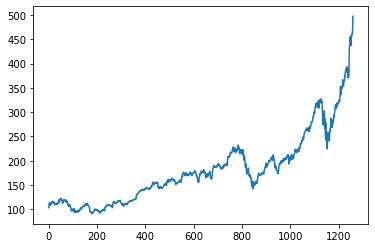

In [23]:
plt.plot(df1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
df1 = sc.fit_transform(np.array(df1).reshape(-1, 1))

In [27]:
print(df1)

[[0.03138969]
 [0.03291251]
 [0.04752665]
 ...
 [0.91489414]
 [0.94011888]
 [1.        ]]


In [28]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size, test_size

(818, 441)

In [32]:
def create_dataset(dataset, time_step = 1):
    dataX, datay = [], []
    for i in range(len(dataset)- time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(datay)

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [37]:
X_train.shape, y_train.shape

((717, 100), (717,))

In [38]:
X_test.shape, y_test.shape

((340, 100), (340,))

In [39]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0097 - val_loss: 0.0485
Epoch 2/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 3/100
12/12 [==============================] - 1s 90ms/step - loss: 5.0833e-04 - val_loss: 0.0027
Epoch 4/100
12/12 [==============================] - 1s 101ms/step - loss: 2.9598e-04 - val_loss: 0.0048
Epoch 5/100
12/12 [==============================] - 2s 129ms/step - loss: 2.8138e-04 - val_loss: 0.0036
Epoch 6/100
12/12 [==============================] - 1s 101ms/step - loss: 2.7550e-04 - val_loss: 0.0034
Epoch 7/100
12/12 [==============================] - 1s 110ms/step - loss: 2.9526e-04 - val_loss: 0.0034
Epoch 8/100
12/12 [==============================] - 1s 103ms/step - loss: 2.6977e-04 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 1s 99ms/step - loss: 2.5530e-04 - val_loss: 0.0050
Epoch 10/100
12/12 [==============================] - 1s 98ms/step

12/12 [==============================] - 1s 109ms/step - loss: 8.9861e-05 - val_loss: 0.0017
Epoch 79/100
12/12 [==============================] - 1s 102ms/step - loss: 8.5897e-05 - val_loss: 0.0013
Epoch 80/100
12/12 [==============================] - 1s 104ms/step - loss: 7.7803e-05 - val_loss: 0.0024
Epoch 81/100
12/12 [==============================] - 1s 107ms/step - loss: 8.3801e-05 - val_loss: 0.0030
Epoch 82/100
12/12 [==============================] - 1s 106ms/step - loss: 7.9803e-05 - val_loss: 0.0018
Epoch 83/100
12/12 [==============================] - 1s 108ms/step - loss: 7.9424e-05 - val_loss: 0.0026
Epoch 84/100
12/12 [==============================] - 1s 106ms/step - loss: 9.8220e-05 - val_loss: 0.0017
Epoch 85/100
12/12 [==============================] - 1s 104ms/step - loss: 7.9654e-05 - val_loss: 0.0026
Epoch 86/100
12/12 [==============================] - 1s 106ms/step - loss: 7.2785e-05 - val_loss: 0.0019
Epoch 87/100
12/12 [==============================] - 1s 10

In [44]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [46]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [47]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

155.03167563668308

In [49]:
np.sqrt(mean_squared_error(ytest,test_predict))

273.2612144836264

Text(0.5, 1.0, 'Test Prediction')

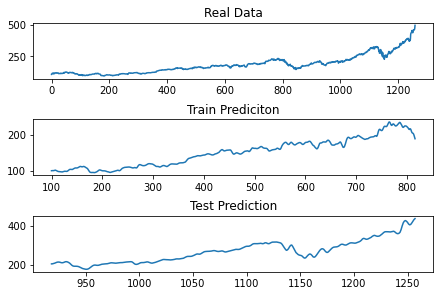

<Figure size 1152x288 with 0 Axes>

In [63]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
fig, axs = plt.subplots(nrows = 3, ncols = 1, constrained_layout = True)
plt.figure(figsize=(16,4))
axs[0].plot(sc.inverse_transform(df1))
axs[1].plot(trainPredictPlot)
axs[2].plot(testPredictPlot)
axs[0].set_title('Real Data')
axs[1].set_title('Train Prediciton')
axs[2].set_title('Test Prediction')

In [64]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [65]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8806797]
101
1 day input [0.3796974  0.37105173 0.42277841 0.41531169 0.43162057 0.4363364
 0.44925578 0.48315076 0.47671563 0.48226654 0.47271209 0.45829444
 0.43726974 0.45625583 0.45362774 0.47312964 0.47362087 0.4623471
 0.48482095 0.49972982 0.4881122  0.49815788 0.50896498 0.51650538
 0.52414403 0.53983888 0.55182493 0.54298276 0.53374761 0.53838974
 0.53389497 0.55170212 0.54723191 0.56218991 0.55634426 0.56135482
 0.55604952 0.55943901 0.55978288 0.55902147 0.56862504 0.57228472
 0.57665668 0.56977944 0.59232696 0.59714103 0.62300437 0.64474137
 0.60313406 0.61025691 0.62054821 0.64287469 0.64167117 0.64201503
 0.63707815 0.659552   0.67836616 0.66247482 0.67421526 0.64668173
 0.66669942 0.67411701 0.67242226 0.67242226 0.69634524 0.69349609
 0.71481554 0.71884364 0.72048927 0.71614187 0.73166478 0.73822272
 0.72640861 0.7244928  0.7444368  0.73109987 0.73377708 0.69027853
 0.68801886 0.70958393 0.69428207 0.71184359 0.72314192 0.82207594
 0.84838139 0.85552881 0.8594341  0.

13 day output [[0.75261307]]
14 day input [0.45625583 0.45362774 0.47312964 0.47362087 0.4623471  0.48482095
 0.49972982 0.4881122  0.49815788 0.50896498 0.51650538 0.52414403
 0.53983888 0.55182493 0.54298276 0.53374761 0.53838974 0.53389497
 0.55170212 0.54723191 0.56218991 0.55634426 0.56135482 0.55604952
 0.55943901 0.55978288 0.55902147 0.56862504 0.57228472 0.57665668
 0.56977944 0.59232696 0.59714103 0.62300437 0.64474137 0.60313406
 0.61025691 0.62054821 0.64287469 0.64167117 0.64201503 0.63707815
 0.659552   0.67836616 0.66247482 0.67421526 0.64668173 0.66669942
 0.67411701 0.67242226 0.67242226 0.69634524 0.69349609 0.71481554
 0.71884364 0.72048927 0.71614187 0.73166478 0.73822272 0.72640861
 0.7244928  0.7444368  0.73109987 0.73377708 0.69027853 0.68801886
 0.70958393 0.69428207 0.71184359 0.72314192 0.82207594 0.84838139
 0.85552881 0.8594341  0.89716068 0.86974996 0.88561674 0.85267967
 0.8883922  0.90804146 0.90703444 0.90408705 0.91346957 0.91489414
 0.94011888 1.      

25 day output [[0.63480157]]
26 day input [0.53983888 0.55182493 0.54298276 0.53374761 0.53838974 0.53389497
 0.55170212 0.54723191 0.56218991 0.55634426 0.56135482 0.55604952
 0.55943901 0.55978288 0.55902147 0.56862504 0.57228472 0.57665668
 0.56977944 0.59232696 0.59714103 0.62300437 0.64474137 0.60313406
 0.61025691 0.62054821 0.64287469 0.64167117 0.64201503 0.63707815
 0.659552   0.67836616 0.66247482 0.67421526 0.64668173 0.66669942
 0.67411701 0.67242226 0.67242226 0.69634524 0.69349609 0.71481554
 0.71884364 0.72048927 0.71614187 0.73166478 0.73822272 0.72640861
 0.7244928  0.7444368  0.73109987 0.73377708 0.69027853 0.68801886
 0.70958393 0.69428207 0.71184359 0.72314192 0.82207594 0.84838139
 0.85552881 0.8594341  0.89716068 0.86974996 0.88561674 0.85267967
 0.8883922  0.90804146 0.90703444 0.90408705 0.91346957 0.91489414
 0.94011888 1.         0.88067973 0.87711078 0.85552675 0.82378918
 0.7891888  0.75738412 0.73255426 0.71732014 0.71230203 0.7159608
 0.72520101 0.7364138

In [75]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

ValueError: x and y must have same first dimension, but have shapes (100,) and (101, 1)

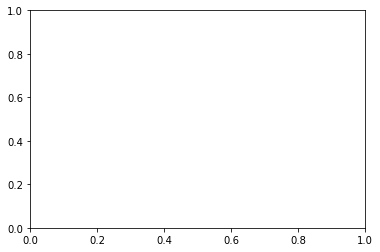

In [76]:
plt.plot(day_new,sc.inverse_transform(df1[1158:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

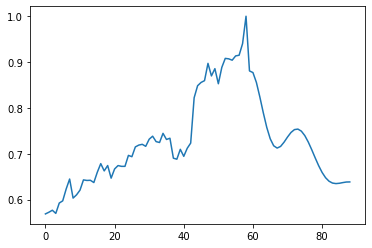

In [72]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

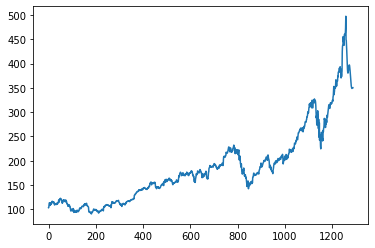

In [74]:
df3=sc.inverse_transform(df3).tolist()
plt.plot(df3)